# Naive Bayes

<ol>
    <li><strong>Apply Naive Bayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_essay(BOW) + preprocessed_project_title(BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_essay(TFIDF) + preprocessed_project_title(TFIDF)</li>        
    </li>
    <li> Here in response encoding we need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then we need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>We will use atleast <strong> 35k </strong> data points </li></ul>
    <br>
    <li>We will summarize the results at the end of the notebook, summarize it in the table format
    </li>
</ol>

## **Importing Libraries**

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint
from scipy.sparse import hstack

import pickle
from tqdm import tqdm

## **Naive Bayes (NB)**

## **1.1 Loading Data**

In [ ]:
data = pd.read_csv('preprocessed_data_1.csv')
data.head(5)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,word_count_title,word_count_essay,project_title,essay
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,5,149,educational support english learners home,students english learners working english seco...
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,4,99,wanted projector hungry learners,students arrive school eager learn polite gene...
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,6,188,soccer equipment awesome middle school students,true champions arenot always ones win guts mia...
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,232.90,2,111,techie kindergarteners,work unique school filled esl english second l...
4,mrs,tx,grades_prek_2,math_science,mathematics,1,1,67.98,3,113,interactive math tools,second grade classroom next year made around 2...


In [ ]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,word_count_title,word_count_essay,project_title,essay
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,154.6,5,149,educational support english learners home,students english learners working english seco...


## **1.2 Splitting data into Train and cross validation (or test) : Stratified Sampling**

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

## **1.3 Make Data Model Ready**

### 1.3.1 Encoding text feature : `essay`

In [ ]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer_bow_essay = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_bow_essay.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
# BOW set
X_train_essay_bow = vectorizer_bow_essay.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow_essay.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow_essay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(49041, 11) (49041,)
(24155, 11) (24155,)
(36052, 11) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_tfidf_essay.fit(X_train['essay'].values) # fit has to happen only on train data

X_train_essay_tfidf = vectorizer_tfidf_essay.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf_essay.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf_essay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 11) (49041,)
(24155, 11) (24155,)
(36052, 11) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


### 1.3.2 Encoding text feature : `project_title`

In [ ]:
# To convert data type from object to Unicode : https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer_bow_project_title = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_bow_project_title.fit(X_train['project_title'].astype('U').values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_title_bow = vectorizer_bow_project_title.transform(X_train['project_title'].astype('U').values)
X_cv_project_title_bow = vectorizer_bow_project_title.transform(X_cv['project_title'].astype('U').values)
X_test_project_title_bow = vectorizer_bow_project_title.transform(X_test['project_title'].astype('U').values)

print("After vectorizations")
print(X_train_project_title_bow.shape, y_train.shape)
print(X_cv_project_title_bow.shape, y_cv.shape)
print(X_test_project_title_bow.shape, y_test.shape)
print("="*100)

(49041, 11) (49041,)
(24155, 11) (24155,)
(36052, 11) (36052,)
After vectorizations
(49041, 3429) (49041,)
(24155, 3429) (24155,)
(36052, 3429) (36052,)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer_tfidf_project_title = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_tfidf_project_title.fit(X_train['project_title'].astype('U').values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_title_tfidf = vectorizer_tfidf_project_title.transform(X_train['project_title'].astype('U').values)
X_cv_project_title_tfidf = vectorizer_tfidf_project_title.transform(X_cv['project_title'].astype('U').values)
X_test_project_title_tfidf = vectorizer_tfidf_project_title.transform(X_test['project_title'].astype('U').values)

print("After vectorizations")
print(X_train_project_title_tfidf.shape, y_train.shape)
print(X_cv_project_title_tfidf.shape, y_cv.shape)
print(X_test_project_title_tfidf.shape, y_test.shape)
print("="*100)

(49041, 11) (49041,)
(24155, 11) (24155,)
(36052, 11) (36052,)
After vectorizations
(49041, 2022) (49041,)
(24155, 2022) (24155,)
(36052, 2022) (36052,)


## **1.4 Make Data Model Ready: Encoding numerical, categorical features**

### 1.4.1 Encoding categorical feature : `school_state`

In [ ]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print("="*100)
print(vectorizer_state.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 1.4.2 Encoding categorical feature : `teacher_prefix`

In [ ]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print("="*100)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### 1.4.3 Encoding categorical feature : `project_grade_category`

In [ ]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print("="*100)
print(vectorizer_grade.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 1.4.4 Encoding categorical feature : `clean_categories`

In [ ]:
vectorizer_cat = CountVectorizer()
vectorizer_cat.fit(X_train['project_subject_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer_cat.transform(X_train['project_subject_categories'].values)
X_cv_categories_ohe = vectorizer_cat.transform(X_cv['project_subject_categories'].values)
X_test_categories_ohe = vectorizer_cat.transform(X_test['project_subject_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print("="*100)
print(vectorizer_cat.get_feature_names())
print("="*100)

After vectorizations
(49041, 50) (49041,)
(24155, 50) (24155,)
(36052, 50) (36052,)
['appliedlearning', 'appliedlearning_health_sports', 'appliedlearning_history_civics', 'appliedlearning_literacy_language', 'appliedlearning_math_science', 'appliedlearning_music_arts', 'appliedlearning_specialneeds', 'appliedlearning_warmth_care_hunger', 'health_sports', 'health_sports_appliedlearning', 'health_sports_history_civics', 'health_sports_literacy_language', 'health_sports_math_science', 'health_sports_music_arts', 'health_sports_specialneeds', 'health_sports_warmth_care_hunger', 'history_civics', 'history_civics_appliedlearning', 'history_civics_health_sports', 'history_civics_literacy_language', 'history_civics_math_science', 'history_civics_music_arts', 'history_civics_specialneeds', 'literacy_language', 'literacy_language_appliedlearning', 'literacy_language_health_sports', 'literacy_language_history_civics', 'literacy_language_math_science', 'literacy_language_music_arts', 'literacy_lan

### 1.4.5 Encoding categorical feature : `clean_subcategories`

In [ ]:
vectorizer_subcat = CountVectorizer()
vectorizer_subcat.fit(X_train['project_subject_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer_subcat.transform(X_train['project_subject_subcategories'].values)
X_cv_subcategories_ohe = vectorizer_subcat.transform(X_cv['project_subject_subcategories'].values)
X_test_subcategories_ohe = vectorizer_subcat.transform(X_test['project_subject_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print("="*100)
print(vectorizer_subcat.get_feature_names())
print("="*100)

After vectorizations
(49041, 381) (49041,)
(24155, 381) (24155,)
(36052, 381) (36052,)
['appliedsciences', 'appliedsciences_charactereducation', 'appliedsciences_civics_government', 'appliedsciences_college_careerprep', 'appliedsciences_communityservice', 'appliedsciences_earlydevelopment', 'appliedsciences_economics', 'appliedsciences_environmentalscience', 'appliedsciences_esl', 'appliedsciences_extracurricular', 'appliedsciences_financialliteracy', 'appliedsciences_foreignlanguages', 'appliedsciences_gym_fitness', 'appliedsciences_health_lifescience', 'appliedsciences_health_wellness', 'appliedsciences_history_geography', 'appliedsciences_literacy', 'appliedsciences_literature_writing', 'appliedsciences_mathematics', 'appliedsciences_music', 'appliedsciences_nutritioneducation', 'appliedsciences_other', 'appliedsciences_parentinvolvement', 'appliedsciences_performingarts', 'appliedsciences_socialsciences', 'appliedsciences_specialneeds', 'appliedsciences_teamsports', 'appliedscience

### 1.4.6 Encoding numerical feature : `price`

In [ ]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)

# initializing normalizer again so as to avoid ValueError: Normalizer expecting more features
normalizer = Normalizer()
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.4.7 Encoding numerical feature : `teacher_number_of_previously_posted_projects`

In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

# initializing normalizer again so as to avoid ValueError: Normalizer expecting more features
normalizer = Normalizer()
X_cv_teacher_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_teacher_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.4.8 Encoding numerical feature : `word_count_title`

In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train['word_count_title'].values.reshape(1,-1))

X_train_word_count_title_norm = normalizer.transform(X_train['word_count_title'].values.reshape(1,-1)).reshape(-1,1)

#initializing normalizer again so as to avoid ValueError: Normalizer expecting more features
normalizer = Normalizer()
X_cv_word_count_title_norm = normalizer.transform(X_cv['word_count_title'].values.reshape(1,-1)).reshape(-1,1)
X_test_word_count_title_norm = normalizer.transform(X_test['word_count_title'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_word_count_title_norm.shape, y_train.shape)
print(X_cv_word_count_title_norm.shape, y_cv.shape)
print(X_test_word_count_title_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.4.9 Encoding numerical feature : `word_count_essay`

In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train['word_count_essay'].values.reshape(1,-1))

X_train_word_count_essay_norm = normalizer.transform(X_train['word_count_essay'].values.reshape(1,-1)).reshape(-1,1)

#initializing normalizer again so as to avoid ValueError: Normalizer expecting more features
normalizer = Normalizer()
X_cv_word_count_essay_norm = normalizer.transform(X_cv['word_count_essay'].values.reshape(1,-1)).reshape(-1,1)
X_test_word_count_essay_norm = normalizer.transform(X_test['word_count_essay'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_word_count_essay_norm.shape, y_train.shape)
print(X_cv_word_count_essay_norm.shape, y_cv.shape)
print(X_test_word_count_essay_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## **1.5 Appling NB on different kind of featurization as mentioned in the instructions**

### **1.5.1 Appling NB: BOW featurization**

### **Set 1: Categorical, numerical features + preprocessed_essay + preprocessed_project_title(BOW)**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr = hstack((X_train_essay_bow, X_train_project_title_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_categories_ohe, X_train_subcategories_ohe, X_train_price_norm, X_train_teacher_posted_projects_norm, X_train_word_count_essay_norm, X_train_word_count_title_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_project_title_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_price_norm, X_cv_teacher_posted_projects_norm, X_cv_word_count_essay_norm, X_cv_word_count_title_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_project_title_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_categories_ohe, X_test_subcategories_ohe, X_test_price_norm, X_test_teacher_posted_projects_norm, X_test_word_count_essay_norm, X_test_word_count_title_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 8924) (49041,)
(24155, 8924) (24155,)
(36052, 8924) (36052,)


#### 1.5.1.1 Hyper parameter Tuning

In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

### Method: GridSearchCV

In [ ]:
mnb = MultinomialNB(class_prior=[0.5, 0.5])
parameters = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(mnb, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
#alpha =  results['param_alpha']

In [ ]:
alphas = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
log_alpha = []
for i in tqdm(alphas):
  x = math.log(i)
  log_alpha.append(x)

100%|██████████| 14/14 [00:00<00:00, 94102.97it/s]


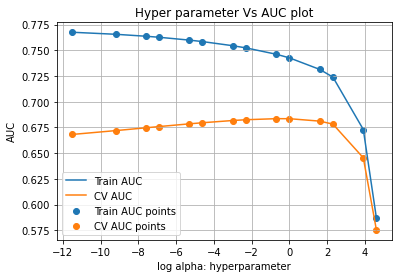

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068552,0.003153,0.013424,0.000335,0.00001,{'alpha': 1e-05},0.672965,0.671862,0.661660,0.661461,...,0.668159,0.005402,12,0.768804,0.766704,0.766491,0.769599,0.765791,0.767478,0.001461
1,0.069289,0.004530,0.014203,0.001610,0.0001,{'alpha': 0.0001},0.676344,0.675241,0.665313,0.666130,...,0.671895,0.005065,11,0.766823,0.764807,0.764490,0.767546,0.763872,0.765508,0.001420
2,0.067679,0.002954,0.013592,0.000791,0.0005,{'alpha': 0.0005},0.678785,0.677761,0.667793,0.669687,...,0.674633,0.004870,10,0.764880,0.762972,0.762567,0.765554,0.762015,0.763597,0.001373
3,0.066829,0.001709,0.013391,0.000259,0.001,{'alpha': 0.001},0.679852,0.678881,0.668817,0.671322,...,0.675830,0.004792,9,0.763865,0.762016,0.761579,0.764517,0.761050,0.762606,0.001346
4,0.066070,0.001073,0.013743,0.001244,0.005,{'alpha': 0.005},0.682131,0.681445,0.671018,0.675017,...,0.678483,0.004658,7,0.761016,0.759332,0.758838,0.761609,0.758360,0.759831,0.001262


In [ ]:
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [ ]:
clf.best_params_

{'alpha': 0.5}

#### 1.5.1.2 Testing the performance of the model on test data, plotting ROC Curves

In [ ]:
best_alpha = 0.5

In [ ]:
mnb = MultinomialNB(alpha=best_alpha, class_prior=[0.5, 0.5], fit_prior=False)
mnb.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(mnb, X_tr)    
y_test_pred = batch_predict(mnb, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [ ]:
bow_train_auc = auc(train_fpr, train_tpr)
bow_test_auc = auc(test_fpr, test_tpr)

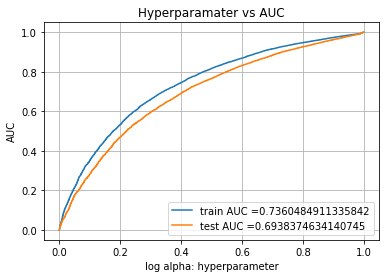

In [ ]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(bow_train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(bow_test_auc))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr) :", max(tpr*(1-fpr)), "for threshold :", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)

The maximum value of tpr*(1-fpr) : 0.46283380942597746 for threshold : 0.45


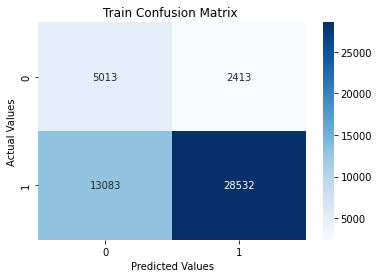

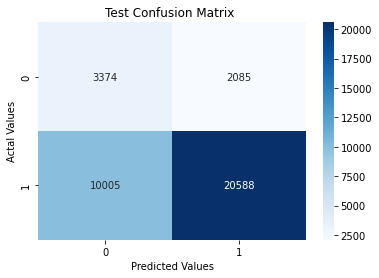

In [ ]:
#confusion matrix heatmap code source : https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
#Train Confusion Matrix
cm_tr = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

cm_df_tr = pd.DataFrame(cm_tr,
                 index = [0, 1], 
                 columns = [0, 1])

sns.heatmap(cm_df_tr, annot=True, fmt="d", cmap='Blues')
plt.title('Train Confusion Matrix ')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Test Confusion Matrix
cm_te = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

cm_df_te = pd.DataFrame(cm_te,
                 index = [0, 1], 
                 columns = [0, 1])

sns.heatmap(cm_df_te, annot=True, fmt="d", cmap='Blues')
plt.title('Test Confusion Matrix ')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### **1.5.2 Appling NB: TFIDF featurization**

### **Set 2: categorical, numerical features + preprocessed_essay + preprocessed_project_title (TFIDF)**

In [ ]:
# if performing GridSearchCV or RandomSearchCV or simple k-fold cv, instead of splitting into train, test, cv just split into train and test data as cv methods perform cross validation

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr = hstack((X_train_essay_tfidf, X_train_project_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_categories_ohe, X_train_subcategories_ohe, X_train_price_norm, X_train_teacher_posted_projects_norm, X_train_word_count_essay_norm, X_train_word_count_title_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_project_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_price_norm, X_cv_teacher_posted_projects_norm, X_cv_word_count_essay_norm, X_cv_word_count_title_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_project_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_categories_ohe, X_test_subcategories_ohe, X_test_price_norm, X_test_teacher_posted_projects_norm, X_test_word_count_essay_norm, X_test_word_count_title_norm)).tocsr()


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7517) (49041,)
(24155, 7517) (24155,)
(36052, 7517) (36052,)


#### 1.5.2.1 Hyper parameter Tuning

#### Method: GridSearchCV

In [ ]:
mnb = MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False)
parameters = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(mnb, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alphas =  results['param_alpha']

In [ ]:
alphas = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
log_alpha = []
for i in tqdm(alphas):
  x = math.log(i)
  log_alpha.append(x)

100%|██████████| 14/14 [00:00<00:00, 90898.23it/s]


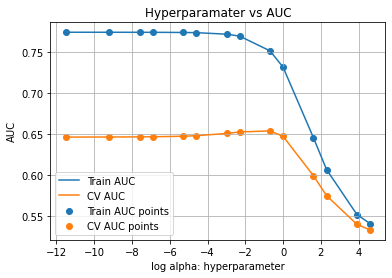

In [ ]:
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparamater vs AUC")
plt.grid()
plt.show()

In [ ]:
clf.best_params_

{'alpha': 0.5}

#### 1.5.1.2 Testing the performance of the model on test data, plotting ROC Curves

In [ ]:
best_alpha = 1

In [ ]:
mnb = MultinomialNB(alpha=best_alpha, class_prior=[0.5, 0.5])
mnb.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(mnb, X_tr)    
y_test_pred = batch_predict(mnb, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [ ]:
tfidf_train_auc = auc(train_fpr, train_tpr)
tfidf_test_auc = auc(test_fpr, test_tpr)

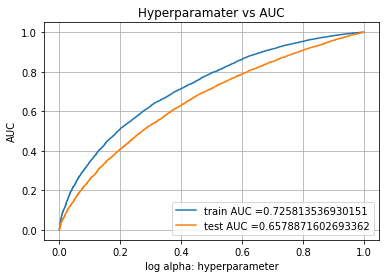

In [ ]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(tfidf_train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(tfidf_test_auc))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr) :", max(tpr*(1-fpr)), "for threshold :", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)

The maximum value of tpr*(1-fpr) : 0.44124241881101434 for threshold : 0.532


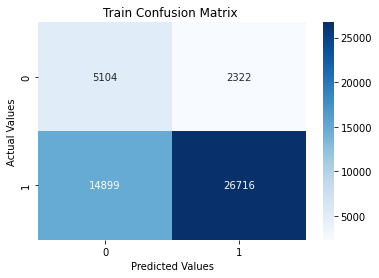

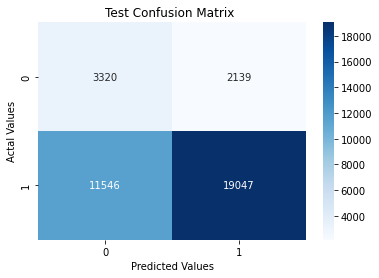

In [ ]:
# confusion matrix heatmap code source : https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
# Train Confusion Matrix
cm_tr = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

cm_df_tr = pd.DataFrame(cm_tr,
                 index = [0, 1], 
                 columns = [0, 1])

sns.heatmap(cm_df_tr, annot=True, fmt="d", cmap='Blues')
plt.title('Train Confusion Matrix ')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Test Confusion Matrix
cm_te = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

cm_df_te = pd.DataFrame(cm_te,
                 index = [0, 1], 
                 columns = [0, 1])

sns.heatmap(cm_df_te, annot=True, fmt="d", cmap='Blues')
plt.title('Test Confusion Matrix ')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### **2. Top 20 features from TFIDF set associated with the positive and negative classes each.**

In [ ]:
# Code Source: https://imgur.com/mWvE7gj
mnb = MultinomialNB(alpha = 0.5,class_prior=[0.5,0.5])

mnb.fit(X_tr, y_train)

MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5])

In [ ]:
feature_names = [] # list to store feature names

In [ ]:
data.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'word_count_title', 'word_count_essay', 'project_title',
       'essay'],
      dtype='object')

In [ ]:
feature_names.extend(vectorizer_tfidf_essay.get_feature_names())
feature_names.extend(vectorizer_tfidf_project_title.get_feature_names())
feature_names.extend(vectorizer_state.get_feature_names())
feature_names.extend(vectorizer_teacher.get_feature_names())
feature_names.extend(vectorizer_grade.get_feature_names())
feature_names.extend(vectorizer_cat.get_feature_names())
feature_names.extend(vectorizer_subcat.get_feature_names())

feature_names.append('price')
feature_names.append('teacher_number_of_previously_posted_projects')
feature_names.append('word_count_essay')
feature_names.append('word_count_title')

#### **Negative Features**

In [ ]:
negative_features = mnb.feature_log_prob_[0, :].argsort()[::-1]
for i in negative_features[0:20]:
  print(feature_names[i])

mrs
grades_prek_2
ms
grades_3_5
literacy_language
math_science
grades_6_8
students
ca
literacy_language_math_science
grades_9_12
mr
health_sports
tx
fl
literacy
literacy_mathematics
mathematics
ny
school


#### **Positive Features**

In [ ]:
positive_features = mnb.feature_log_prob_[1, :].argsort()[::-1]
for i in positive_features[:20]:
  print(feature_names[i])

mrs
grades_prek_2
ms
grades_3_5
literacy_language
grades_6_8
math_science
ca
students
literacy_language_math_science
grades_9_12
mr
health_sports
literacy
literacy_mathematics
ny
tx
fl
literature_writing_mathematics
school


## **3. Summary**

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Test AUC"]

x.add_row(["BOW", "Naive Bayes", 0.5, bow_test_auc])
x.add_row(["TFIDF", "Naive Bayes", 0.5, tfidf_test_auc])

print(x)

+------------+-------------+-----------------+--------------------+
| Vectorizer |    Model    | Hyper Parameter |      Test AUC      |
+------------+-------------+-----------------+--------------------+
|    BOW     | Naive Bayes |       0.5       | 0.6938374634140745 |
|   TFIDF    | Naive Bayes |       0.5       | 0.6578871602693362 |
+------------+-------------+-----------------+--------------------+
